In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
df = pd.read_excel('customerdatabase.xls')
df.head()

,title,sex,age,maritalstatus,income,customertype,son,family,occupation,livestatus,expected,cregion,status,ctstatus,custstatus,contype
0,3,1,31,2,40000.0,1,0,0,7,3,2,7,6,3,3,2
1,4,2,52,7,20000.0,1,0,0,8,6,5,1,6,2,1,3
2,4,1,36,1,17000.0,1,2,2,6,1,4,3,6,2,1,3
3,3,1,23,3,15000.0,1,0,0,6,4,2,6,6,2,1,2
4,3,1,53,3,20000.0,1,0,0,5,1,2,5,6,3,3,3


In [3]:
print('Data set has {} rows and {} columns.\n'.format(df.shape[0],df.shape[1]))
df.info()

Data set has 32005 rows and 16 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32005 entries, 0 to 32004
Data columns (total 16 columns):
title            32005 non-null int64
sex              32005 non-null int64
age              32005 non-null int64
maritalstatus    32005 non-null int64
income           32005 non-null float64
customertype     32005 non-null int64
son              32005 non-null int64
family           32005 non-null int64
occupation       32005 non-null int64
livestatus       32005 non-null int64
expected         32005 non-null int64
cregion          32005 non-null int64
status           32005 non-null int64
ctstatus         32005 non-null int64
custstatus       32005 non-null int64
contype          32005 non-null int64
dtypes: float64(1), int64(15)
memory usage: 3.9 MB


In [4]:
# Standardize the data set
scaler = StandardScaler()
df_scl = scaler.fit_transform(df)

In [5]:
# Normalize
norm = normalize(df_scl)

In [6]:
# Set normalize data frame
df_norm = pd.DataFrame(norm)

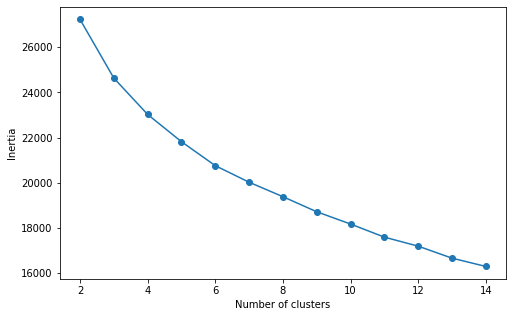

In [7]:
# K-Means Clustering
scores = []
for k in range(2,15):
    km = KMeans(n_clusters=k,random_state=123)
    km = km.fit(df_norm)
    scores.append(km.inertia_)
dfk = pd.DataFrame({'Cluster':range(2,15), 'Score':scores})
plt.figure(figsize=(8,5))
plt.plot(dfk['Cluster'], dfk['Score'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [8]:
for i in range(5,11):
    kmeans_labels = KMeans(n_clusters=i,random_state=123).fit_predict(df_norm)
    print("Silhouette score for {} clusters k-means : {} ".format(i,metrics.silhouette_score(df_norm,kmeans_labels,metric='euclidean').round(3)))

Silhouette score for 5 clusters k-means : 0.141 
Silhouette score for 6 clusters k-means : 0.143 
Silhouette score for 7 clusters k-means : 0.135 
Silhouette score for 8 clusters k-means : 0.136 
Silhouette score for 9 clusters k-means : 0.146 
Silhouette score for 10 clusters k-means : 0.142 


In [9]:
for i in [5,6,7,8]:
    kmeans_labels = KMeans(n_clusters=i,random_state=123).fit_predict(df_norm)
    print('Davies Boulding Score for ',i,' clusters k-means : ',str(metrics.davies_bouldin_score(df_norm,kmeans_labels).round(3)))

Davies Boulding Score for  5  clusters k-means :  2.179
Davies Boulding Score for  6  clusters k-means :  2.082
Davies Boulding Score for  7  clusters k-means :  2.276
Davies Boulding Score for  8  clusters k-means :  2.208


In [10]:
kmeans_labels = KMeans(n_clusters=6,random_state=150).fit_predict(df_norm)

In [11]:
df['Clusters'] = list(kmeans_labels)
customers = pd.DataFrame(df['Clusters'].value_counts()).rename(columns={'Clusters':'Numbers of Customers'})
customers.T

,1,5,2,0,4,3
Numbers of Customers,8556,6042,5135,5112,4071,3089


In [12]:
means = pd.DataFrame(df.describe().loc['mean'])
means.T.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]].round(1)

,title,sex,age,maritalstatus,income,customertype,son,family,occupation,livestatus,expected,cregion,status,ctstatus,custstatus,contype
mean,4.0,1.4,38.0,2.9,21976.9,1.0,0.3,0.6,5.1,3.0,3.1,3.5,4.6,2.3,3.3,2.9


In [13]:
df.set_index('Clusters')
grouped = df.groupby(by='Clusters').mean().round(1)
grouped.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]

,title,sex,age,maritalstatus,income,customertype,son,family,occupation,livestatus,expected,cregion,status,ctstatus,custstatus,contype
Clusters,,,,,,,,,,,,,,,,
0,3.2,1.0,43.4,3.5,22326.3,1.0,0.0,0.1,4.5,3.9,4.2,2.4,5.8,2.2,2.0,2.6
1,5.0,2.0,37.9,3.1,22487.0,1.0,0.0,0.2,5.2,3.0,3.2,3.2,5.4,2.3,2.5,2.4
2,4.0,1.5,36.8,2.9,20619.5,1.0,0.2,0.5,5.2,2.9,2.8,3.9,1.0,1.9,1.2,5.5
3,4.0,1.4,36.9,2.8,23162.7,1.0,0.2,0.4,5.4,3.1,3.1,4.2,4.8,3.0,12.8,2.1
4,4.0,1.4,40.9,1.8,22894.6,1.0,1.9,3.0,5.0,2.8,2.5,3.7,4.6,2.3,3.1,2.6
5,3.1,1.0,33.0,3.0,20888.1,1.0,0.1,0.2,5.2,2.4,2.5,4.0,5.2,2.3,2.8,2.2


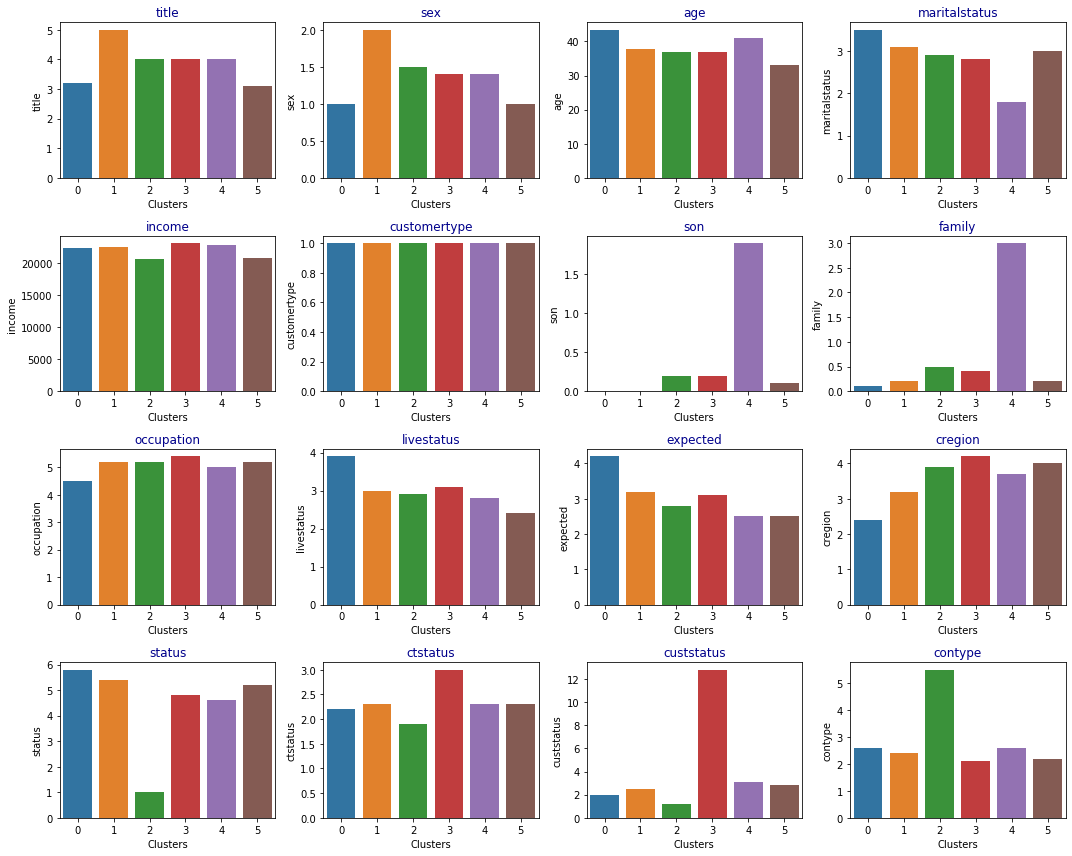

In [14]:
features = ['title','sex','age','maritalstatus','income','customertype','son','family','occupation',
            'livestatus','expected','cregion','status','ctstatus','custstatus','contype']
plt.figure(figsize=(15,12))
for i,j in enumerate(features):
    plt.subplot(4,4,i+1)
    sns.barplot(grouped.index,grouped[j])
    plt.title(j,fontdict={'color':'darkblue'})
plt.tight_layout()
plt.show()

In [15]:
df

,title,sex,age,maritalstatus,income,customertype,son,family,occupation,livestatus,expected,cregion,status,ctstatus,custstatus,contype,Clusters
0,3,1,31,2,40000.0,1,0,0,7,3,2,7,6,3,3,2,5
1,4,2,52,7,20000.0,1,0,0,8,6,5,1,6,2,1,3,0
2,4,1,36,1,17000.0,1,2,2,6,1,4,3,6,2,1,3,4
3,3,1,23,3,15000.0,1,0,0,6,4,2,6,6,2,1,2,5
4,3,1,53,3,20000.0,1,0,0,5,1,2,5,6,3,3,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32000,2,2,36,3,20000.0,1,0,0,5,6,5,8,6,3,3,2,0
32001,3,1,36,3,30000.0,1,0,0,2,4,2,3,2,2,4,2,5
32002,5,2,33,3,30000.0,1,0,0,7,2,2,3,2,2,4,2,1
32003,5,2,46,3,100000.0,2,0,0,2,6,5,3,6,2,1,3,1


In [16]:
filepath = 'customersegment.xlsx'
writer = pd.ExcelWriter(filepath)
df.to_excel(writer, 'Segment', index=False)
writer.save()